## Introduction

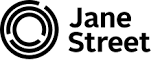

### Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import data

In [ ]:
df_train = pd.read_csv('../input/jane-street-market-prediction/train.csv')
df_features = pd.read_csv('../input/jane-street-market-prediction/features.csv')
#df_exp_test = pd.read_csv('../input/jane-street-market-prediction/example_test.csv')
df_exp_sub = pd.read_csv('../input/jane-street-market-prediction/example_sample_submission.csv')

In [ ]:
df_train.head()

In [ ]:
df_train.drop(columns=['weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp'], inplace = True)

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [ ]:
resumetable(df_train[:])[:]

In [ ]:
#dataframe after dropping ['weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']
df_train.head()

In [ ]:
col_list = df_train.columns.to_list()

In [ ]:
col_list

In [ ]:
df_train['date-ts-id'] = df_train['date'].astype(str) + "-" + df_train['ts_id'].astype(str)

In [ ]:
df_train['date-ts-id'].tail()

In [ ]:
df_train.set_index('date-ts-id', inplace=True)

In [ ]:
df_train.head()

In [ ]:
df_train.feature_1.plot()

In [ ]:
total = len(df_train)

plt.figure(figsize = (108,6))

g = sns.countplot(x="date", data=df_train, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Date Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Date Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [ ]:
#df_train.date.value_counts().reset_index(name='Number of entries for each date')
df_train.groupby('date').size().sort_values(ascending=False).reset_index(name='Count on each date')